# California COVID Breakthrough Cases

A recent article posed the question of why Florida wouldn't release information on trends for vaccinated versus unvaccinated cases and why Florida has gone from one of the most transparent states to one of the most opaque states in terms of tracking and releasing Covid information.
https://www.tampabay.com/news/health/2021/12/22/why-wont-florida-cdc-release-states-breakthrough-covid-data/

In this article, it is also mentioned that the state of Florida had issued a statement saying that one third of their cases were breakthrough cases. This is typically an attempt to downplay the effectiveness of the vaccine in terms of public health while continuing to withold information that would substantiate their claim. While Florida won't release their information we can take a look at how other states are faring to get a picture of what might be going on within Florida. 

California is one state that is tracking vaccinated versus unvaccinated case information so we can take a look at the information from California and attempt to draw some sort of parrellel between the two. The information for California is available here ...
https://data.chhs.ca.gov/dataset/covid-19-post-vaccination-infection-data

Based on this information, we can see that California is close to being in the same situation as Florida where roughly one third of their covid cases are breakthrough cases but based on the data we can see that this is only because the total number of cases have dropped significantly over the past several months and while the unvaccinated cases have dropped significantly, the vaccinated cases have remained somewhat constant. The fact that the vaccinated cases have remained somewhat stagnant could be caused by a lack of booster shots. Unfortunately, booster shot information is not currently being tracked.

In [1]:
import sys
import sklearn

# Matplotlib stuff
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Common imports
import numpy as np
import pandas as pd
import os

import seaborn as sns
sns.set(style="whitegrid")

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
COVID_DATA_PATH = "data"
BREAKTHROUGH_DATA_FILENAME = "covid19postvaxstatewidestats.csv"

breakthrough_data_path = os.path.join(COVID_DATA_PATH, BREAKTHROUGH_DATA_FILENAME)
breakthrough_cases = pd.read_csv(breakthrough_data_path)
breakthrough_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          307 non-null    object 
 1   area                          307 non-null    object 
 2   area_type                     307 non-null    object 
 3   unvaccinated_cases            307 non-null    int64  
 4   vaccinated_cases              307 non-null    int64  
 5   unvaccinated_hosp             307 non-null    int64  
 6   vaccinated_hosp               307 non-null    int64  
 7   unvaccinated_deaths           307 non-null    int64  
 8   vaccinated_deaths             307 non-null    int64  
 9   population_unvaccinated       307 non-null    int64  
 10  population_vaccinated         307 non-null    int64  
 11  unvaccinated_cases_per_100k   307 non-null    float64
 12  vaccinated_cases_per_100k     307 non-null    float64
 13  unvac

In [3]:
# We have to change this from a string to a datetime object to display in the graph properly
breakthrough_cases['date'] = pd.to_datetime(breakthrough_cases['date'], format = '%Y-%m-%d')
breakthrough_cases.head()

,date,area,area_type,unvaccinated_cases,vaccinated_cases,unvaccinated_hosp,vaccinated_hosp,unvaccinated_deaths,vaccinated_deaths,population_unvaccinated,population_vaccinated,unvaccinated_cases_per_100k,vaccinated_cases_per_100k,unvaccinated_hosp_per_100k,vaccinated_hosp_per_100k,unvaccinated_deaths_per_100k,vaccinated_deaths_per_100k
0,2021-02-01,California,State,13812,20,792,0,368,0,32637088,337374,37.388227,3.895634,2.160557,0.127032,1.016372,0.0
1,2021-02-02,California,State,11329,18,628,0,308,0,32520772,371401,35.331704,3.461795,2.101075,0.115393,1.008586,0.0
2,2021-02-03,California,State,10320,26,562,0,302,0,32385940,407816,33.746567,3.643100,1.988958,0.105089,1.001757,0.0
3,2021-02-04,California,State,8987,16,497,0,284,0,32222640,429263,32.084806,3.560921,1.900616,0.099839,0.985997,0.0
4,2021-02-05,California,State,8392,16,513,0,318,0,32059845,445121,30.847667,3.594528,1.829614,0.032094,0.987885,0.0


## Display Vaccinated vs Unvaccinated Cases

Saving figure CaliforniaBreakthroughCases


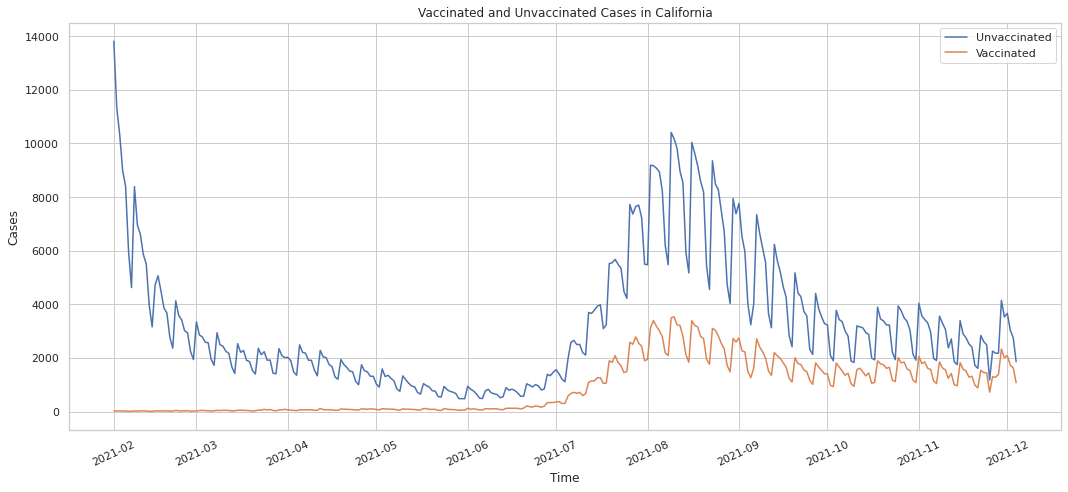

In [4]:
# create the time series plot
fig, ax = plt.subplots(figsize = (15, 7))

sns.lineplot(ax=ax, x = "date", y = "unvaccinated_cases", data = breakthrough_cases).set(title='Vaccinated and Unvaccinated Cases in California')
sns.lineplot(ax=ax, x = "date", y = "vaccinated_cases", data = breakthrough_cases)
plt.legend(labels=["Unvaccinated","Vaccinated"])
plt.ylabel("Cases")
plt.xlabel("Time")
plt.xticks(rotation = 25)
# save_fig('CaliforniaBreakthroughCases')
plt.show()

## Display Vaccinated vs Unvaccinated Deaths

Saving figure CaliforniaBreakthroughDeaths


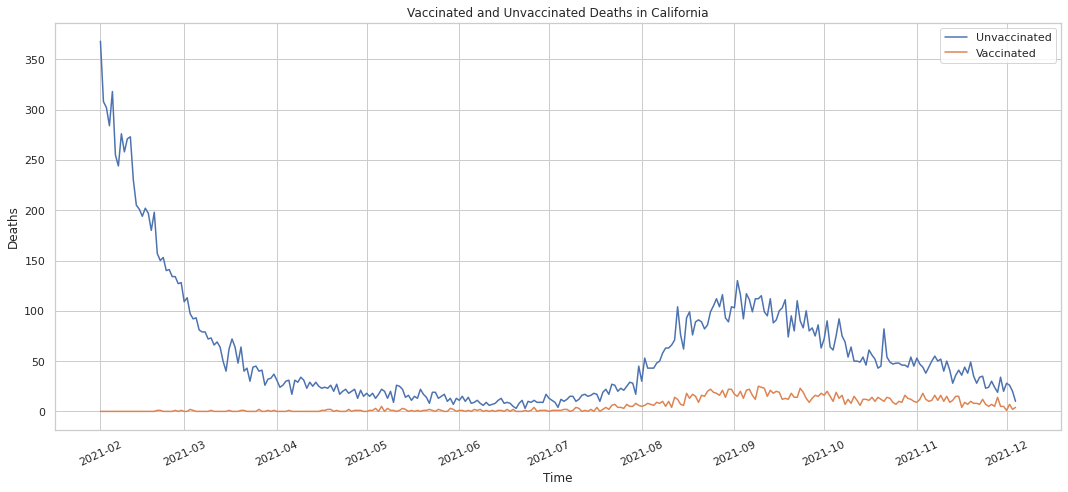

In [5]:
# create the time series plot
fig, ax = plt.subplots(figsize = (15, 7))

sns.lineplot(ax=ax, x = "date", y = "unvaccinated_deaths", data = breakthrough_cases).set(title='Vaccinated and Unvaccinated Deaths in California')
sns.lineplot(ax=ax, x = "date", y = "vaccinated_deaths", data = breakthrough_cases)
plt.legend(labels=["Unvaccinated","Vaccinated"])
plt.ylabel("Deaths")
plt.xlabel("Time")
plt.xticks(rotation = 25)
# save_fig('CaliforniaBreakthroughDeaths')
plt.show()